In [1]:
import requests
import pandas as pd
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
from bs4 import BeautifulSoup
import seaborn as sns
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%config InlineBackend.figure_format = 'retina'
import multiprocessing.dummy as mp 


<h3>TICKERS of interest<h3>
 <ul>
     <li>ABB.ST</li>
     <li>ACB.TO</li>
     <li>ALFA.ST</li>
     <li>AMD</li>
     <li>APH.TO</li>
     <li>SAAB-B.ST</li>
     <li>ERIC-.ST</li>
     <li>FORTUM.HE</li>
     <li>INVE-B.ST</li>
     <li>NDA-SE.ST</li>
     <li>NOKIA-SEK.ST</li>
     <li>SWED-A.ST</li>
     <li>TEL2-B.ST</li>
     <li>VOLV-B.ST</li>

</ul>

In [5]:
df = pd.DataFrame()

In [7]:
TICKERS = ['ABB.ST', 'HOLM-B.ST', "AXFO.ST", "TIETOS.ST", "STE-A.ST", "NOBINA.ST", "WALL-B.ST", 
          'FORTUM.HE', 'INVE-B.ST', "KLOV-B.ST", "HM-B.ST", "TREL-B.ST", "ICA.ST", "SECU-B.ST",
          'SWED-A.ST', "BILI-A.ST","LUPE.ST","SCA-B.ST", "CLAS-B.ST", "INTRUM.ST", "JNJ", "AZN.ST",
          "AAPL", "SNE", "BABA", "KIND-SDB.ST", "CAPMAN.HE", "AMZN", "DTE.DE", "DUNI.ST", 
           "BURE.ST", "MSFT", ]

for i in TICKERS:
    df = get_ticker(i, '2017-01-01', '2019-04-20', df, i)

df = remove_NaN(df)

df.columns = TICKERS

df = df.astype(float)

convert_EUR(df, 'FORTUM.HE')
convert_EUR(df, "CAPMAN.HE")
convert_EUR(df, "DTE.DE")

convert_USD(df, "MSFT")
convert_USD(df, "AMZN")
convert_USD(df, "BABA")
convert_USD(df, "SNE")
convert_USD(df, "AAPL")
convert_USD(df, "JNJ")

ABB.ST already in dataframe
HOLM-B.ST already in dataframe
AXFO.ST already in dataframe
TIETOS.ST already in dataframe
STE-A.ST already in dataframe
NOBINA.ST already in dataframe
WALL-B.ST already in dataframe
FORTUM.HE already in dataframe
INVE-B.ST already in dataframe
KLOV-B.ST already in dataframe
HM-B.ST already in dataframe
TREL-B.ST already in dataframe
ICA.ST already in dataframe
SECU-B.ST already in dataframe
SWED-A.ST already in dataframe
BILI-A.ST already in dataframe
LUPE.ST already in dataframe
SCA-B.ST already in dataframe
CLAS-B.ST already in dataframe
INTRUM.ST already in dataframe
JNJ already in dataframe
AZN.ST already in dataframe
AAPL already in dataframe
SNE already in dataframe
BABA already in dataframe
KIND-SDB.ST already in dataframe
CAPMAN.HE already in dataframe
AMZN already in dataframe
DTE.DE already in dataframe
DUNI.ST already in dataframe
BURE.ST already in dataframe
MSFT already in dataframe
MSFT seems to already be converted
AMZN seems to already be co

,ABB.ST,HOLM-B.ST,AXFO.ST,TIETOS.ST,STE-A.ST,NOBINA.ST,WALL-B.ST,FORTUM.HE,INVE-B.ST,KLOV-B.ST,...,AAPL,SNE,BABA,KIND-SDB.ST,CAPMAN.HE,AMZN,DTE.DE,DUNI.ST,BURE.ST,MSFT
2017-01-03,193.6,163.55,141.7,249.5,99.35,50.75,69.55,155.182610,343.2,9.27,...,116.15,270.470638,88.60,85.20,13.124375,753.67,171.771820,123.50,104.50,62.58
2017-01-04,193.8,162.45,142.0,248.9,100.00,52.50,70.00,154.342650,342.7,9.12,...,116.02,273.243225,90.51,86.05,13.124375,757.18,173.871720,124.00,102.50,62.30
2017-01-05,192.4,162.15,141.5,247.1,101.30,53.25,69.05,154.552640,340.0,8.96,...,116.61,274.581716,94.37,84.75,13.124375,780.45,174.396695,123.00,104.75,62.30
2017-01-09,194.4,159.50,142.0,250.3,100.50,51.00,69.00,155.812580,341.6,9.01,...,118.99,275.537780,94.72,84.10,13.124375,796.92,172.086805,122.25,101.75,62.64
2017-01-10,197.2,159.50,141.7,251.5,99.70,50.75,68.75,155.917575,339.7,9.11,...,119.11,282.325838,96.75,83.05,13.229370,795.90,170.616875,120.50,101.00,62.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-22,209.5,288.60,208.6,272.0,141.00,63.25,106.50,224.269320,500.8,17.82,...,261.78,585.111455,186.78,62.08,21.733965,1745.72,158.542450,122.60,179.40,149.59
2019-11-25,211.5,290.60,211.2,273.0,144.00,62.95,107.20,225.634255,504.0,17.99,...,266.37,590.847842,190.45,62.86,21.838960,1773.84,158.332460,124.20,185.60,151.23
2019-11-26,212.0,288.80,211.1,269.2,145.00,63.40,108.80,224.689300,506.2,18.35,...,264.29,603.754712,194.70,61.18,21.838960,1796.94,158.017475,122.60,184.80,152.03
2019-11-27,211.2,289.60,209.6,270.8,143.00,64.00,108.60,224.689300,506.8,18.51,...,267.84,609.204280,200.82,60.22,21.838960,1818.51,160.117375,123.00,180.20,152.32


In [8]:
'''Function arguments'''
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 10000
risk_free_rate = 0.0178

Text(0, 0.5, 'price in SEK')

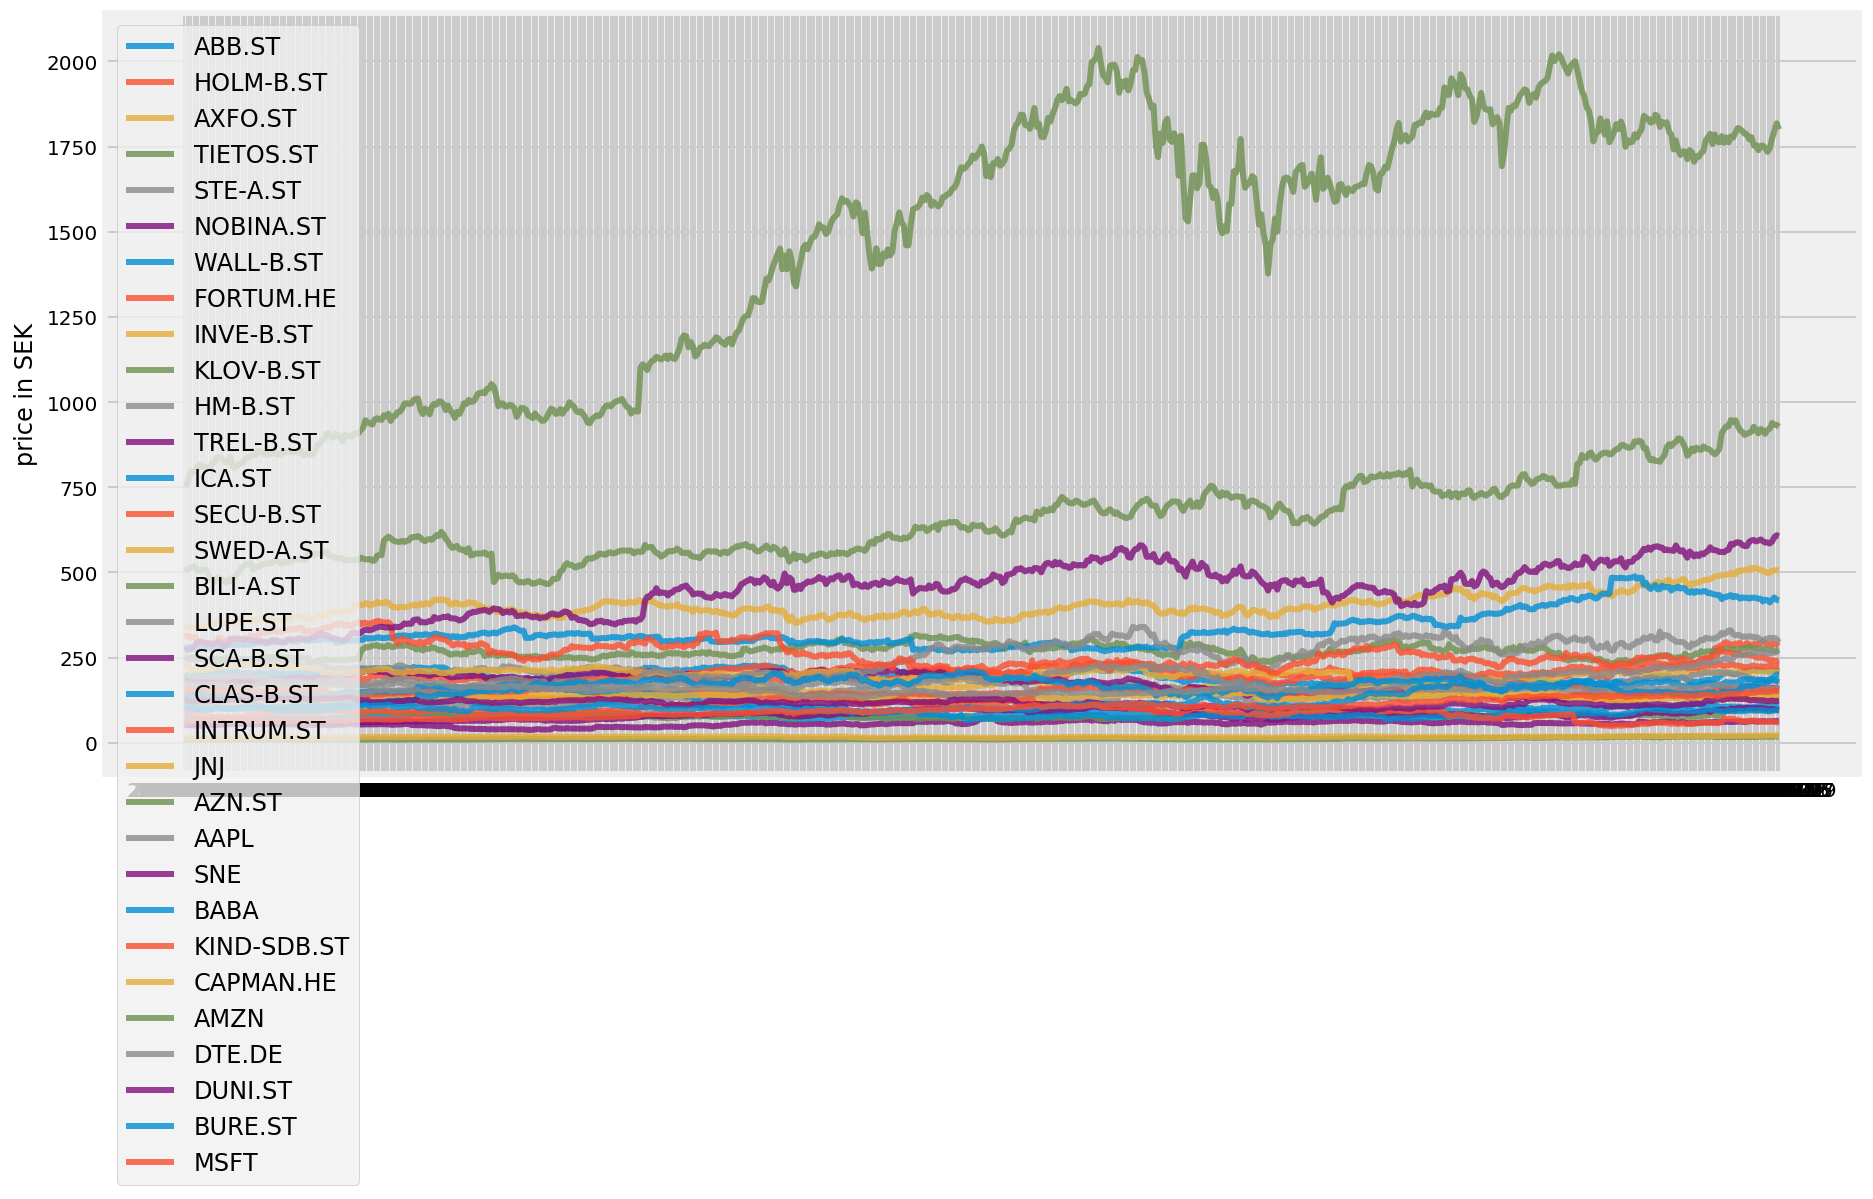

In [9]:
'''Plots closing price for all TICKERS'''
plt.figure(figsize=(14, 7))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in SEK')

Text(0, 0.5, 'daily returns')

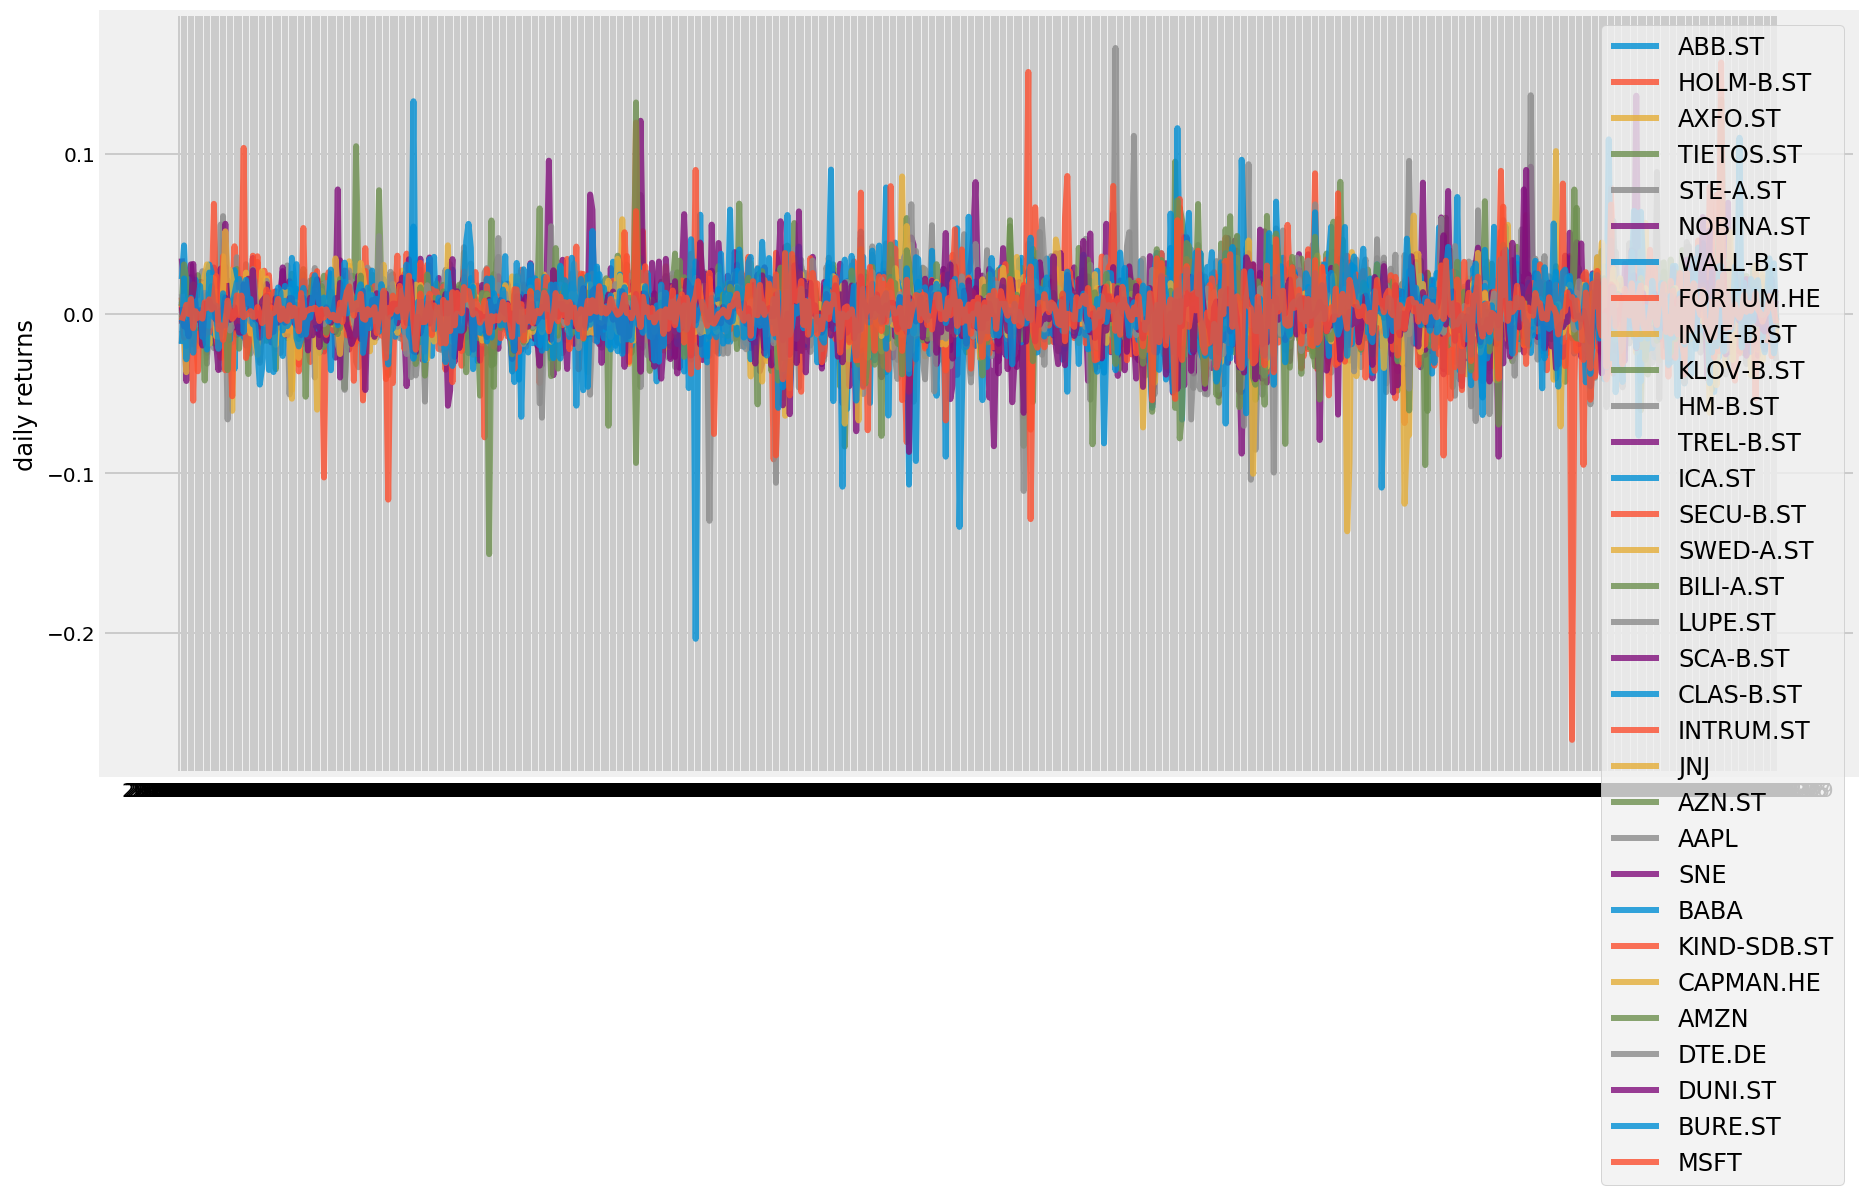

In [10]:
'''Plots daily returns in percent for every TICKER'''
returns = df.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [11]:
exp_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
plt.figure(figsize=(14, 7))
for c in exp_ret.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

NameError: name 'weights' is not defined

In [13]:
random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

(array([[0.11327828, 0.1140438 , 0.11154942, ..., 0.11093664, 0.11323799,
         0.12100951],
        [0.14860357, 0.13279252, 0.16448595, ..., 0.15622371, 0.12294261,
         0.22386762],
        [1.15471009, 1.00831896, 1.31498622, ..., 1.24777271, 0.92851001,
         1.70290431],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 [array([0.01028293, 0.02036575, 0.00417857, 0.03097469, 0.05625993,
         0.06243949, 0.0489676 , 0.05176339, 0.01813277, 0.0433797 ,
         0.00628932, 0.00536738, 0.03971445, 0.02312629, 0.06660746,
         0.04219718, 0.04592242, 0.03719821, 0.01810953, 0.02514153,
         0.01501571, 0.01255816, 0.02631278, 0.01301079, 0.04114896,
         0.05946309, 0.04191871, 0.01704926, 0.01211952, 0.05499

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.12


            ABB.ST  HOLM-B.ST  AXFO.ST  TIETOS.ST  STE-A.ST  NOBINA.ST  \
allocation    1.81       0.68     2.08       2.65      6.51       3.14   

            WALL-B.ST  FORTUM.HE  INVE-B.ST  KLOV-B.ST  ...  AAPL   SNE  BABA  \
allocation       5.71       0.37        0.5       6.68  ...  6.59  1.12  5.86   

            KIND-SDB.ST  CAPMAN.HE  AMZN  DTE.DE  DUNI.ST  BURE.ST  MSFT  
allocation         1.32       3.49  6.81    1.29     0.66     6.76  3.73  

[1 rows x 32 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.15
Annualised Volatility: 0.1


            ABB.ST  HOLM-B.ST  AXFO.ST  TIETOS.ST  STE-A.ST  NOBINA.ST  \
allocation    0.51       1.47     5.35       2.42      0.81       6.01   

            W

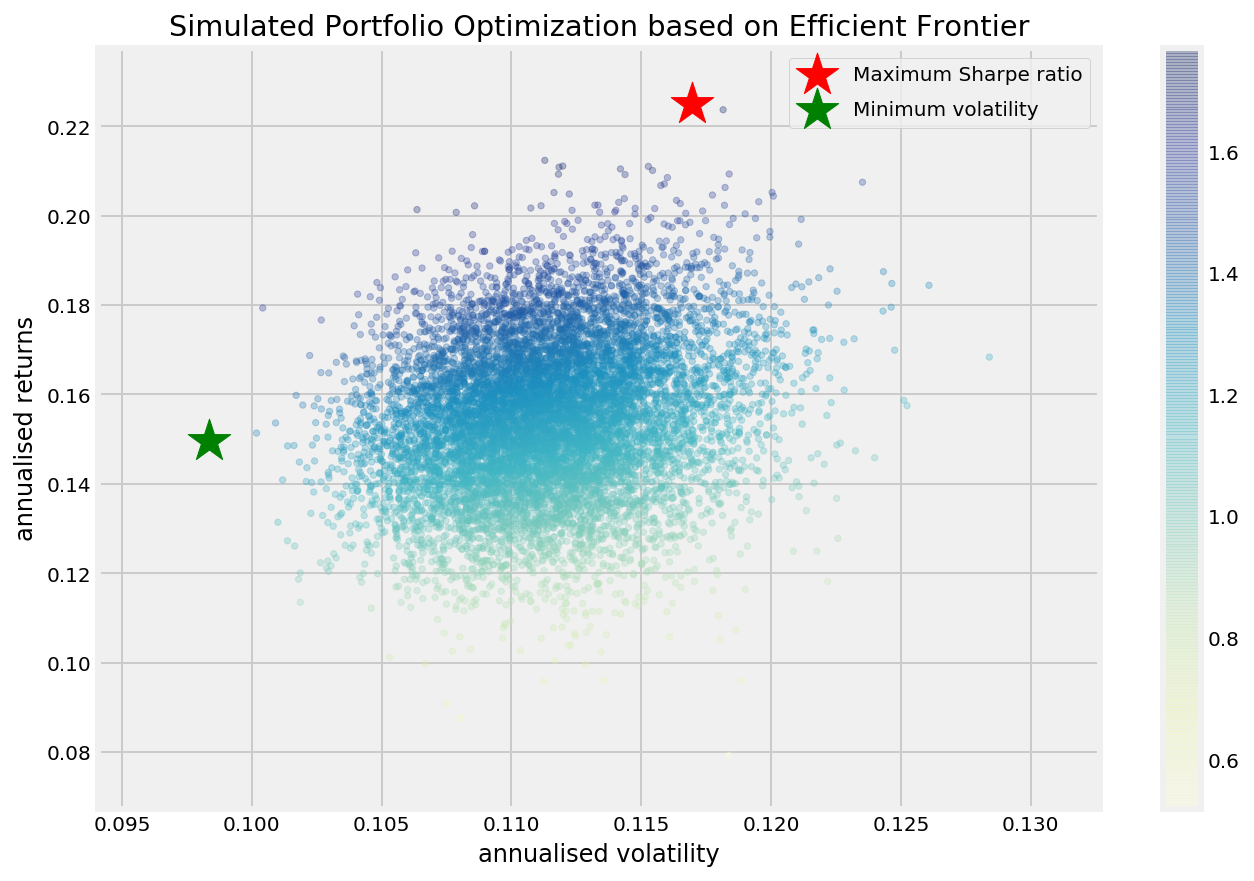

In [14]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.31
Annualised Volatility: 0.12


            ABB.ST  HOLM-B.ST  AXFO.ST  TIETOS.ST  STE-A.ST  NOBINA.ST  \
allocation     0.0       9.14     2.73        0.0       0.0        0.0   

            WALL-B.ST  FORTUM.HE  INVE-B.ST  KLOV-B.ST  ...  AAPL   SNE  BABA  \
allocation        0.0       1.33        0.0      14.01  ...  6.33  8.26  0.75   

            KIND-SDB.ST  CAPMAN.HE  AMZN  DTE.DE  DUNI.ST  BURE.ST   MSFT  
allocation          0.0      11.79  1.88     0.0      0.0      0.0  19.12  

[1 rows x 32 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.09


            ABB.ST  HOLM-B.ST  AXFO.ST  TIETOS.ST  STE-A.ST  NOBINA.ST  \
allocation     0.0       4.08      6.7       1.26       0.0        1.9   

          

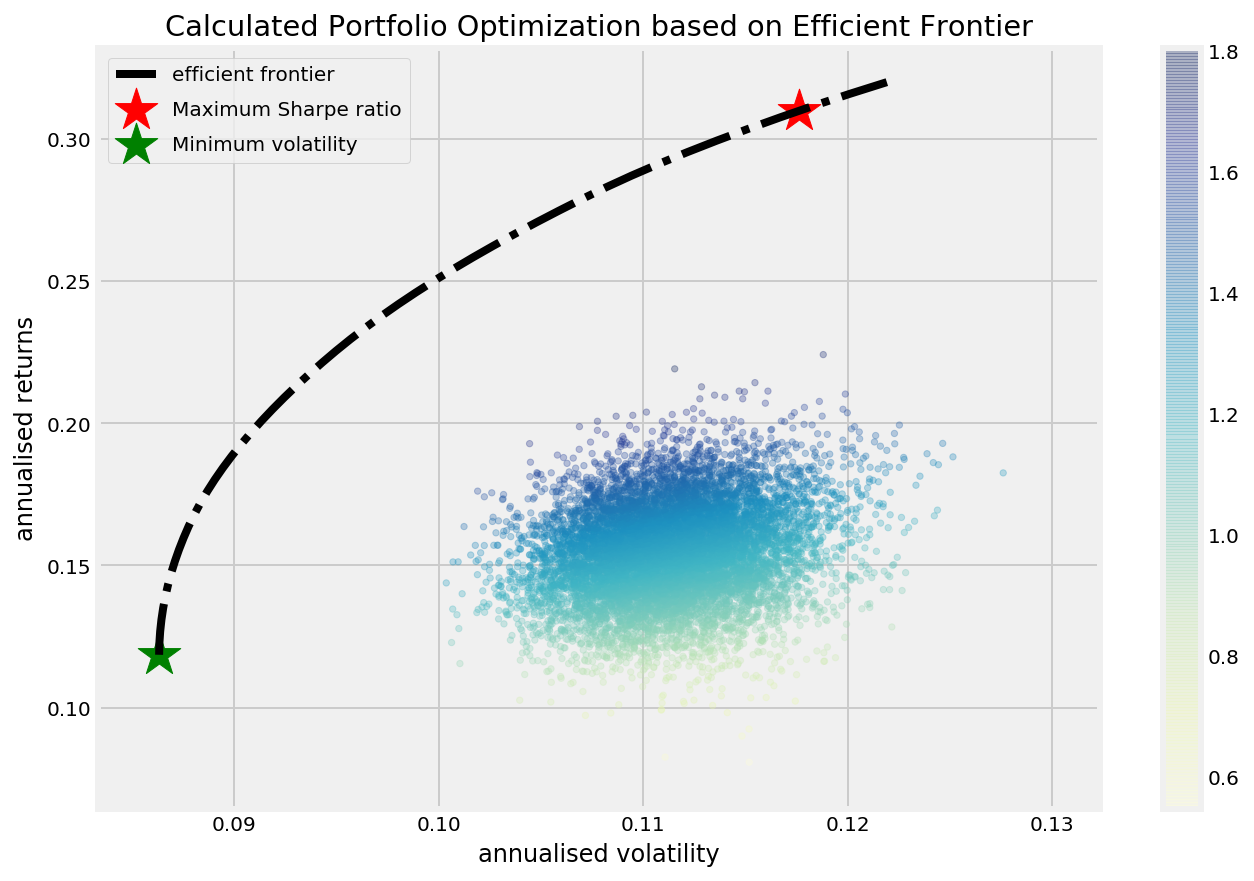

In [20]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.31
Annualised Volatility: 0.12


            ABB.ST  HOLM-B.ST  AXFO.ST  TIETOS.ST  STE-A.ST  NOBINA.ST  \
allocation     0.0       9.14     2.73        0.0       0.0        0.0   

            WALL-B.ST  FORTUM.HE  INVE-B.ST  KLOV-B.ST  ...  AAPL   SNE  BABA  \
allocation        0.0       1.33        0.0      14.01  ...  6.33  8.26  0.75   

            KIND-SDB.ST  CAPMAN.HE  AMZN  DTE.DE  DUNI.ST  BURE.ST   MSFT  
allocation          0.0      11.79  1.88     0.0      0.0      0.0  19.12  

[1 rows x 32 columns]
allocation    0.0
Name: ABB.ST, dtype: float64
allocation    9.14
Name: HOLM-B.ST, dtype: float64
allocation    2.73
Name: AXFO.ST, dtype: float64
allocation    0.0
Name: TIETOS.ST, dtype: float64
allocation    0.0
Name: STE-A.ST, dtype: float64
allocation    0.0
Name: NOBINA.ST, dtype: float64
allocation    0.0
Name: WALL-B.ST, dtyp

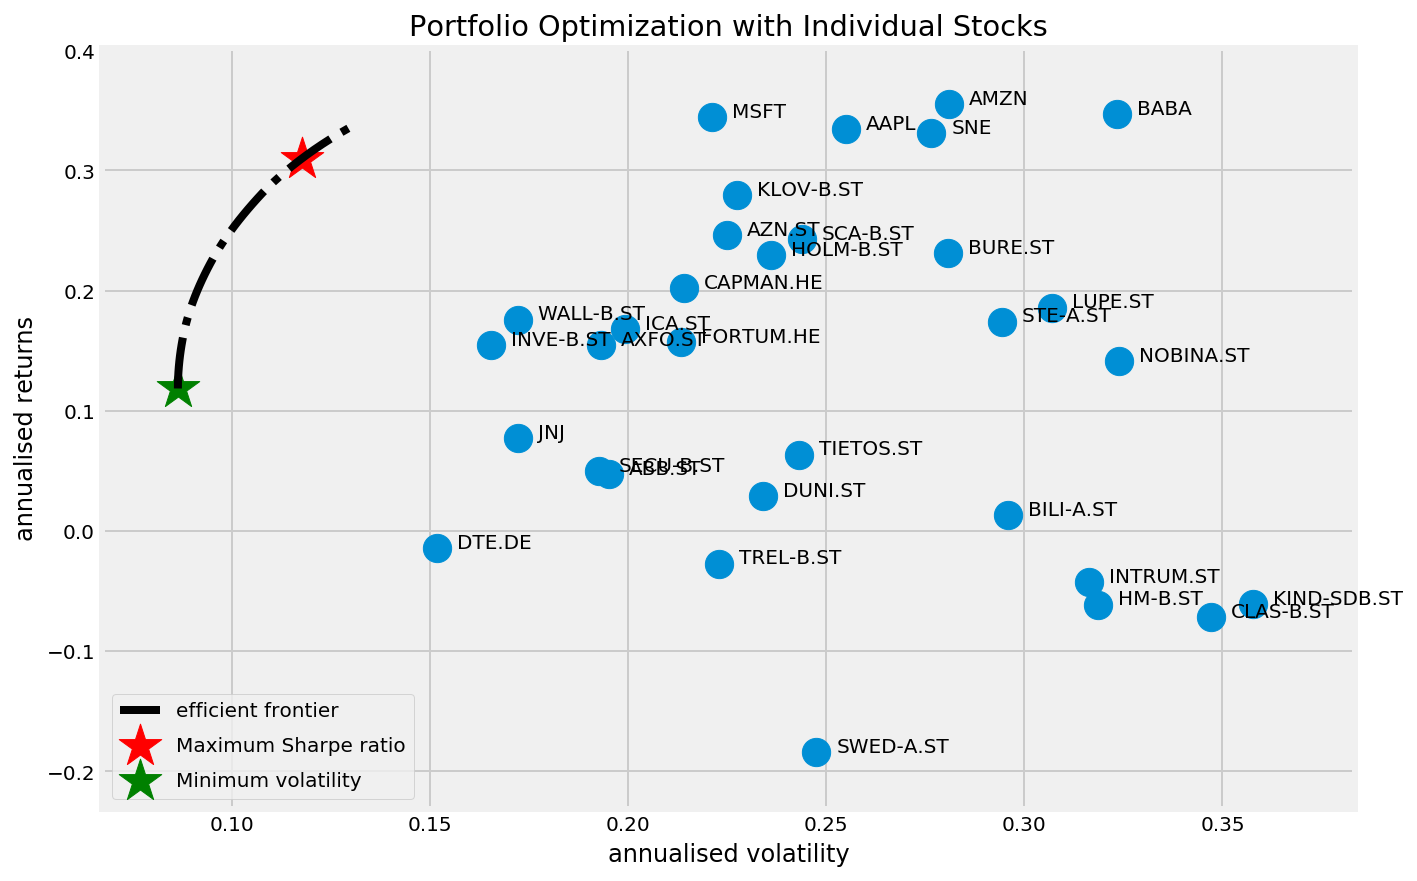

In [33]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

In [2]:
def get_ticker(TICKER, DATE_FROM, DATE_TO, DATAFRAME, DF_TICKER):
    '''Gets historical DATA from a TICKER and given range, and then appends it to
    a DATAFRAME'''
    df = pd.DataFrame()
    API_KEY = 'mbad9NhOd3PkFvk4gzkmVeoimAlKhgsyJ0NhsvqrkvGePvod0u51ufUWjIEZ'
    url = 'https://www.worldtradingdata.com/api/v1/history?symbol=\
    {}&date_from={}&date_to{}&sort=newest&api_token={}'.format(TICKER, DATE_FROM, DATE_TO, API_KEY)
    
    '''Makes a request to the API that returns a JSON-response '''
    
    r = requests.get(url)
    sample = json.loads(r.text)
    
    '''Puts sample in Dataframe under each TICKER'''
    try:
        DF_TICKER = pd.DataFrame.from_dict(data=sample['history'],orient='index')
        cols = ['close']
        DF_TICKER = DF_TICKER[cols]
        DF_TICKER = DF_TICKER.rename(columns={'close':TICKER})
        if DATAFRAME.empty == True:
            DATAFRAME = DATAFRAME.append(DF_TICKER)
            print('First column')
            DATAFRAME.head()
            return DATAFRAME
        elif TICKER in DATAFRAME:
            print(TICKER, 'already in dataframe')
            return DATAFRAME

        else:
            DATAFRAME = pd.concat((DATAFRAME, DF_TICKER), axis=1, ignore_index=True, sort=True)
            print('Added:', TICKER)
            return DATAFRAME
    except:
        print('NO DATA IN RANGE', TICKER)
        return DATAFRAME

def remove_NaN(DATAFRAME):
    '''Removes ROWS with NaN-values '''
    DATAFRAME = DATAFRAME.dropna()
    return DATAFRAME

def convert_USD(DATAFRAME, TICKER):
    '''Converts prices from USD to SEK'''
    c = CurrencyRates()
    rate = c.get_rate('USD', 'SEK')
    if DATAFRAME.loc['2019-02-15', TICKER] < 100:
        DATAFRAME.loc[:,TICKER] *= rate
        return DATAFRAME
    else:
        print(TICKER, 'seems to already be converted')
        return DATAFRAME
    
    
def convert_EUR(DATAFRAME, TICKER):
    '''Converts prices from EUR to SEK'''
    c = CurrencyRates()
    rate = c.get_rate('EUR', 'SEK')
    if DATAFRAME.loc['2019-02-15', TICKER] < 100:
        DATAFRAME.loc[:,TICKER] *= rate
        return DATAFRAME
    else:
        print(TICKER, 'seems to already be converted')
        return DATAFRAME

In [12]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    '''Annual returns =[(Daily+1)^252-1] '''
    returns = np.sum((((mean_returns+1)**252)-1)*weights ) 
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((32,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(32)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record


In [32]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    
    
    max_sharpe_idx = np.argmax((results[2]))
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
    method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
    method='SLSQP', bounds=bounds, constraints=constraints)

    return result

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    for i in max_sharpe_allocation:
        print(max_sharpe_allocation[i])
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    print("-"*80)
    print("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(df.columns):
        print(txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(df.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)
    



In [ ]:
'''Selenium web-scraper example to use if all else fails'''
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager


d = webdriver.Chrome(ChromeDriverManager().install())
d.get('https://www.investing.com/funds/lansforsakringar-global-indexnara-historical-data')
try:
    WebDriverWait(d, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".closer"))).click()
    d.find_element_by_css_selector('.closer').click()
except:
    pass
d.find_element_by_id('widgetFieldDateRange').click()
sDate  = d.find_element_by_id('startDate')
sDate.clear()
sDate.send_keys('01/18/2019')
eDate = d.find_element_by_id('endDate')
eDate.clear()
eDate.send_keys('04/18/2019')
d.find_element_by_id('applyBtn').click()

data = []
html = BeautifulSoup(d.page_source, 'html.parser')
table_body = html.find('table[@class="genTbl closedTbl historicalTbl"]/tbody/tr')
print(html.contents)
    
d.quit()


#for x in comment_ids:
    #Extract dates from for each user on a page
    #user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
    #date = user_date.get_attribute('title')
